In [4]:
import pandas as pd

In [5]:
import ast


df = pd.read_csv("gpt_confidence_benchmark.csv")
df
# list_from_string = ast.literal_eval(df['log_probs'][0])

# list_from_string

,generated,log_probs,linear_probs,correct_answer
0,"['C', ')', ' Dun', ' &', ' Brad', 'street', ',...","[-2.2007884e-05, -5.5122365e-07, -3.888926e-06...","[99.99779923581717, 99.9999448776502, 99.99961...",C
1,"['B', ')', ' Discipline', '-based', ' inquiry'...","[-0.0009424308, -4.3202e-07, -2.2365493e-05, -...","[99.90580131484319, 99.99995679800934, 99.9977...",B
2,"['D', ')', ' ', '451', ' degrees', '\n', 'Conf...","[-0.0033709155, -3.1281633e-07, -4.8425554e-06...","[99.66347596570382, 99.99996871837189, 99.9995...",D
3,"['D', ')', ' Grape', ' \n', 'Conf', 'idence', ...","[-0.5219891, -4.3202e-07, -9.0883464e-07, -2.4...","[59.33391624846759, 99.99995679800934, 99.9999...",C
4,"['B', ')', ' Mer', 'iw', 'ether', ' and', ' Wi...","[-0.00017708084, -4.3202e-07, -1.60477e-05, -9...","[99.98229348378865, 99.99995679800934, 99.9983...",B
...,...,...,...,...
995,"['A', ')', ' Wrong', ',', ' Wrong', '\n', 'Con...","[-0.14433391, -1.962381e-05, -0.0025705448, -1...","[86.55986677473399, 99.99803763825457, 99.7432...",B
996,"['B', ')', ' Wrong', ',', ' Not', ' wrong', '\...","[-1.4963243, -7.107425e-06, -6.6306106e-06, -1...","[22.395182885680857, 99.99928926002578, 99.999...",A
997,"['A', ')', ' Wrong', ',', ' Wrong', '\n', 'Con...","[-0.22657631, -1.27099975e-05, -0.00046260483,...","[79.72585011953976, 99.99872900832717, 99.9537...",A
998,"['A', ')', ' Wrong', ',', ' Wrong', '\n', 'Con...","[-0.2938832, -1.962381e-05, -5.2001665e-06, -3...","[74.53635448213075, 99.99803763825457, 99.9994...",B


In [60]:
correct_answers_list = []
predicted_answer_list = []
logprob_list = []
linear_prob_list = []
llm_confidence_list = []


def find_letter_in_list(lst):
    # Define the letters to search for
    letters_to_find = {'A', 'B', 'C', 'D'}
    
    # Loop through the list with index
    for index, value in enumerate(lst):
        # Check if the value (stripped of spaces) is one of the letters
        if value.strip() in letters_to_find:
            return value.strip(), index  # Return the found letter and its index
    
    # If no matching letter is found, return None
    return None, -1

import re

def extract_confidence(gen_list):
    generated_text = "".join(gen_list)
    
    # Regular expression to find the last integer or decimal number, optionally in parentheses
    match = re.search(r'(\d+(\.\d+)?)\)?\s*$', generated_text)
    
    if match:
        confidence_value = match.group(1)
        return confidence_value
    else:
        return None

# Test case
# print(extract_confidence(['D', ')', ' ', '451', ' degrees', '\n', 'Conf', 'idence', ':', ' ', '0', '.', '9']))

for i, row in df.iterrows():
    # print(i)
    generation = ast.literal_eval(df['generated'][i])
    log_probs = ast.literal_eval(df['log_probs'][i]) 
    correct_answer = df['correct_answer'][i]
    linear_prob = ast.literal_eval(df['linear_probs'][i])

    llm_confidence = extract_confidence(generation)
    predicted_answer = find_letter_in_list(generation)[0]


    if predicted_answer is None or llm_confidence is None:
        # print(generation)
        continue 

    llm_confidence_list.append(float(llm_confidence))

    predicted_answer_list.append(predicted_answer)
    correct_answers_list.append(correct_answer)
    logprob_list.append(log_probs[find_letter_in_list(generation)[1]])
    linear_prob_list.append(linear_prob[find_letter_in_list(generation)[1]])
new_df = pd.DataFrame({
    'correct_answer': correct_answers_list,
    'predicted_answer': predicted_answer_list,
    'logprob': logprob_list,
    'linear_prob': linear_prob_list,
    'confidence': llm_confidence_list
})

new_df

new_df[new_df['confidence'] > 0.7]
import numpy as np
new_df['llm Confidence'] = np.where(new_df['confidence'] > 0.7, 1, 0)

Frequency of Confident Correct Answers: 739
Frequency of Not Confident Correct Answers: 2
Frequency of Confident Incorrect Answers: 256
Frequency of Not Confident Incorrect Answers: 3


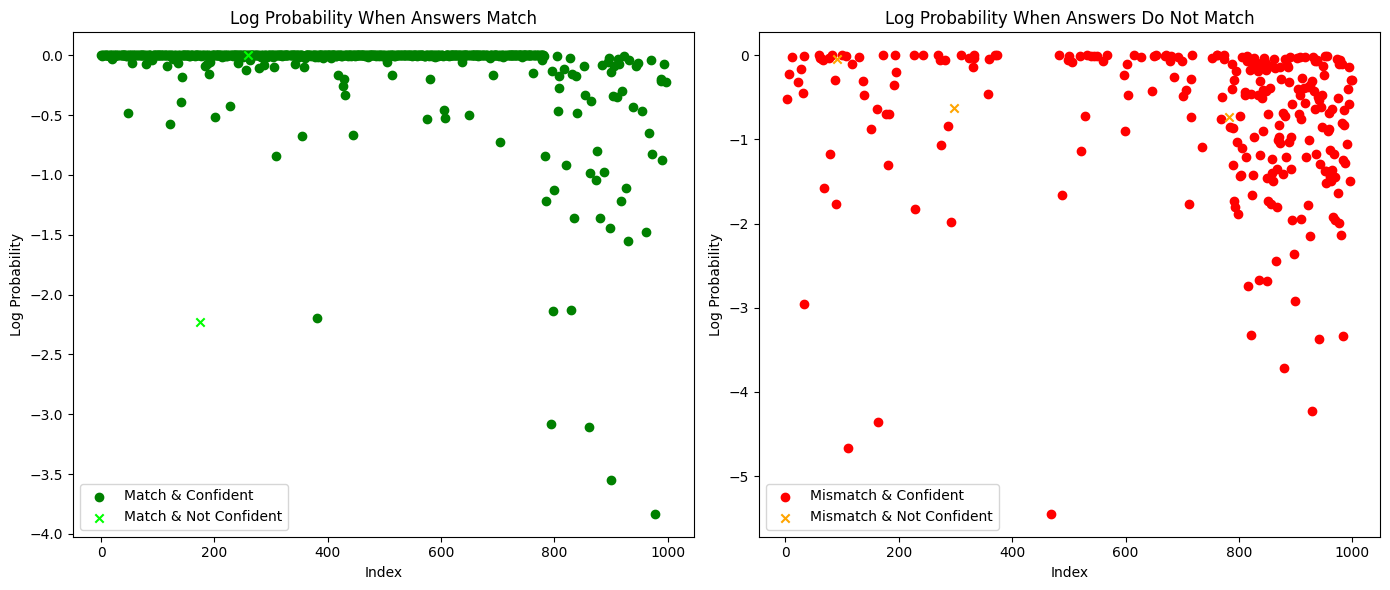

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_df is already created with 'correct_answer', 'predicted_answer', 'logprob', and 'llm Confidence' columns

# Filter categories
match_confident = new_df[(new_df['correct_answer'] == new_df['predicted_answer']) & (new_df['llm Confidence'] == 1)]
match_not_confident = new_df[(new_df['correct_answer'] == new_df['predicted_answer']) & (new_df['llm Confidence'] == 0)]
mismatch_confident = new_df[(new_df['correct_answer'] != new_df['predicted_answer']) & (new_df['llm Confidence'] == 1)]
mismatch_not_confident = new_df[(new_df['correct_answer'] != new_df['predicted_answer']) & (new_df['llm Confidence'] == 0)]

# Calculate frequencies
freq_match_confident = len(match_confident)
freq_match_not_confident = len(match_not_confident)
freq_mismatch_confident = len(mismatch_confident)
freq_mismatch_not_confident = len(mismatch_not_confident)

# Print frequencies
print("Frequency of Confident Correct Answers:", freq_match_confident)
print("Frequency of Not Confident Correct Answers:", freq_match_not_confident)
print("Frequency of Confident Incorrect Answers:", freq_mismatch_confident)
print("Frequency of Not Confident Incorrect Answers:", freq_mismatch_not_confident)

# Create scatter plot
plt.figure(figsize=(14, 6))

# Plot when answers match
plt.subplot(1, 2, 1)
plt.scatter(match_confident.index, match_confident['logprob'], color='green', marker='o', label='Match & Confident')
plt.scatter(match_not_confident.index, match_not_confident['logprob'], color='lime', marker='x', label='Match & Not Confident')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Match")
plt.legend()

# Plot when answers do not match
plt.subplot(1, 2, 2)
plt.scatter(mismatch_confident.index, mismatch_confident['logprob'], color='red', marker='o', label='Mismatch & Confident')
plt.scatter(mismatch_not_confident.index, mismatch_not_confident['logprob'], color='orange', marker='x', label='Mismatch & Not Confident')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Do Not Match")
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


##### Observations

As seen in the results above, LLMs, specifically GPT3.5, are not a reliable source to assess the confidence in its own answer. 

The LLM only categorized five answers as not confident, and claimed high confidence in over 98% of the incorrect answers.

This points us to leverage alternative directions to such as Logprobs to assess a confidence of a model, and flag potentially incorrect responses